# Decorated Decision Tree Regressor

This notebook contains an example of how to use the decorated decision tree regressor.

In [1]:
from DecoratedDecisionTree import DecoratedDecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DecoratedDecisionTreeRegressor?

Init signature: DecoratedDecisionTreeRegressor(dtr, decorator)
Docstring:      <no docstring>
Init docstring:
Creates a decorated decision tree regressor.  A decision tree is fit 
according to the supplied DecisionTreeRegressor.  The data on the
leaves of the tree are fit according to a supplied decorator
which is a regression algorithm.

Parameters
----------
dtr : sklearn.tree.DecisionTreeRegressor
    Decision tree regressor
decorator : Regessor
    Regression algorithm used to fit at the leaves of the tree.
File:           c:\users\tj\documents\code\decorateddecisiontree\decorateddecisiontree.py
Type:           type
Subclasses:     


We test how well this regressor fits $y = X^2 + \epsilon$ where $\epsilon \sim \text{N}(0, \sigma)$ compared to a plain decision tree regressor.

In [3]:
sigma = 20000
data = pd.DataFrame({'X': np.arange(-500, 500)})
noise = np.random.normal(0, sigma, len(data))
data['y'] = data['X']**2
data['y_jitter'] = data['y'] + noise

data.head()

,X,y,y_jitter
0,-500,250000,253679.722276
1,-499,249001,231472.073101
2,-498,248004,279155.126921
3,-497,247009,260387.603710
4,-496,246016,229098.673810


Create a decorated decision tree regressor where the base tree is has at least 10 samples in every leaf and the data within each leaf is fit with linear regression.

In [4]:
ddtr = DecoratedDecisionTreeRegressor(DecisionTreeRegressor(min_samples_leaf=120), LinearRegression())

Fit the decorated decision tree model and make the prediction.

In [5]:
ddtr.fit(data[['X']], data['y_jitter'])
data['y_decorated_tree'] = ddtr.predict(data[['X']])

data.head()

,X,y,y_jitter,y_decorated_tree
0,-500,250000,253679.722276,245502.273229
1,-499,249001,231472.073101,244680.014842
2,-498,248004,279155.126921,243857.756455
3,-497,247009,260387.603710,243035.498068
4,-496,246016,229098.673810,242213.239680


The decorated decision tree regressor contains the base decision tree regressor.  Let's take a look what what this regressor predicts `y` should be.

In [6]:
# The base decision tree regressor
ddtr.dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=120, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
# Predict using the base tree
data['y_base_tree'] = ddtr.dtr.predict(data[['X']])
data.head()

,X,y,y_jitter,y_decorated_tree,y_base_tree
0,-500,250000,253679.722276,245502.273229,188766.44452
1,-499,249001,231472.073101,244680.014842,188766.44452
2,-498,248004,279155.126921,243857.756455,188766.44452
3,-497,247009,260387.603710,243035.498068,188766.44452
4,-496,246016,229098.673810,242213.239680,188766.44452


Let's plot the predictions of the decorated tree compared to the base tree to see how well they did.

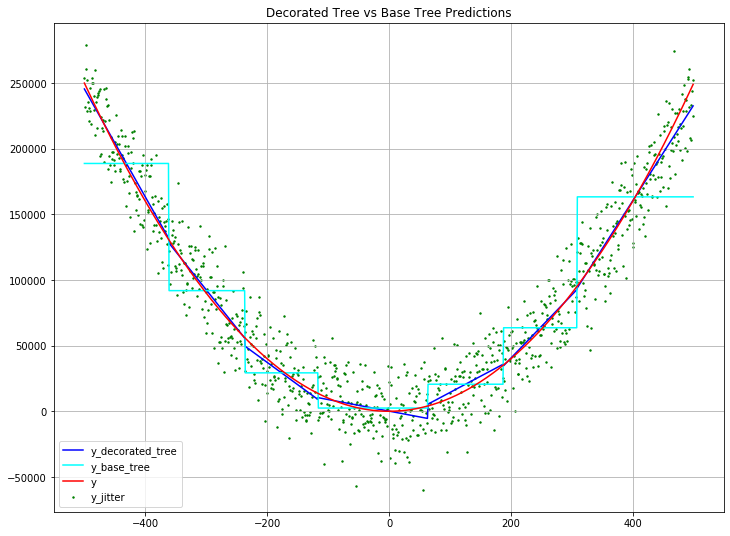

In [8]:
fig = plt.figure(figsize = (1.5*8, 1.5*6))
ax = plt.axes()
ax.set_title('Decorated Tree vs Base Tree Predictions')
ax.scatter(data['X'], data['y_jitter'], color='green', label='y_jitter', s=2)
ax.plot(data['X'], data['y_decorated_tree'], color='blue', label = 'y_decorated_tree')
ax.plot(data['X'], data['y_base_tree'], color='cyan', label = 'y_base_tree')
ax.plot(data['X'], data['y'], color='red', label='y')
ax.legend()
ax.grid()

Notice that a decorated tree does a better job at predicting `y` than the base tree.

In [9]:
print('RMSD Decorated Tree:', int(mean_squared_error(data['y_decorated_tree'], data['y'])**0.5))
print('RMSD Base Tree     :', int(mean_squared_error(data['y_base_tree'], data['y'])**0.5))

RMSD Decorated Tree: 3618
RMSD Base Tree     : 26031
